In [1]:
import numpy as np
import pandas as pd
import pickle

%matplotlib inline
import matplotlib.pyplot as plt

- Import Feature vectors and its label

In [2]:
caffe_root = '/home/ashu/Desktop/Thesis Work/Classifier/caffe/'
classifier_type = 'gt'
class_name = 'global'
fc7_path = caffe_root + 'models/' + classifier_type + '_classifier/all/fc7/' + \
        classifier_type + '_fc7_' + class_name + '.pkl'
    
fc7_new_path = caffe_root + 'models/' + classifier_type + '_classifier/all/fc7/' + \
        classifier_type + '_fc7_new_' + class_name + '.pkl'

fc7_label_path = caffe_root + 'models/' + classifier_type + '_classifier/all/fc7/' + \
        classifier_type + '_label_' + class_name + '.pkl'

fileObject = open(fc7_path,'r')
fc7 = pickle.load(fileObject)  
fileObject.close()

fileObject = open(fc7_new_path,'r')
fc7_new = pickle.load(fileObject)  
fileObject.close()

fileObject = open(fc7_label_path,'r')
fc7_label = pickle.load(fileObject)  
fileObject.close()

print fc7[:3]
print fc7_new[:3]
print fc7_label[:3]

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  4.38832045]], dtype=float32), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), array([[ 0.        ,  0.        ,  0.72384149, ...,  0.        ,
         0.        ,  0.21219775]], dtype=float32)]
[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.00488022]], dtype=float32), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), array([[ 0.        ,  0.        ,  0.01134285, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)]
[0, 0, 2]


In [6]:
for i in range(len(fc7)):
    if np.allclose(fc7[0], fc7[i]):
        continue
    else:
        print 'diffrent'
        break

diffrent


In [3]:
X = np.array(fc7)
y = np.array(fc7_label)
X_new = np.array(fc7_new)

print X.shape, y.shape

X = X.reshape((X.shape[0], -1))
X_new = X_new.reshape((X_new.shape[0], -1))
print X.shape, X_new.shape

feat_cols = [ str(i) for i in range(X.shape[1]) ]
new_cols = [ str(i) for i in range(X_new.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

df_new = pd.DataFrame(X_new,columns=new_cols)
df_new['label'] = y
df_new['label'] = df_new['label'].apply(lambda i: str(i))


X_new, X, y = None, None, None

print 'Size of the dataframe: {}'.format(df.shape)
print 'Size of new dataframe: {}'.format(df_new.shape)
print df.head(3)
print df_new.head(3)

(9846, 1, 4096) (9846,)
(9846, 4096) (9846, 4096)
Size of the dataframe: (9846, 4097)
Size of new dataframe: (9846, 4097)
     0    1         2        3    4         5    6    7         8    9  ...    \
0  0.0  0.0  0.000000  1.76251  0.0  0.000000  0.0  0.0  5.286067  0.0  ...     
1  0.0  0.0  0.000000  0.00000  0.0  0.000000  0.0  0.0  0.000000  0.0  ...     
2  0.0  0.0  0.723841  0.00000  0.0  0.984786  0.0  0.0  0.000000  0.0  ...     

   4087      4088      4089  4090  4091      4092  4093  4094      4095  label  
0   0.0  0.000000  0.000000   0.0   0.0  0.000000   0.0   0.0  4.388320      0  
1   0.0  0.169252  0.000000   0.0   0.0  4.355366   0.0   0.0  0.000000      0  
2   0.0  0.000000  0.956621   0.0   0.0  0.000000   0.0   0.0  0.212198      2  

[3 rows x 4097 columns]
     0    1         2         3    4    5    6    7         8    9  ...    \
0  0.0  0.0  0.000000  0.018335  0.0  0.0  0.0  0.0  0.071417  0.0  ...     
1  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.

In [5]:
import time

from sklearn.manifold import TSNE

df_tsne = df.copy()
df_new_tsne = df_new.copy()

pp = [30]
n_iter = [300, 1000, 2000]

for p in pp:
    for it in n_iter:
        x_str = 'x_' + str(p) + '_' + str(it)
        y_str = 'y_' + str(p) + '_' + str(it)

        time_start = time.time()
        tsne_1 = TSNE(n_components=2, init='pca', perplexity=p, n_iter=it)
        tsne_results = tsne_1.fit_transform(df[feat_cols].values)
        
        tsne_2 = TSNE(n_components=2, init='pca', perplexity=p, n_iter=it)
        tsne_new = tsne_2.fit_transform(df_new[new_cols].values)
        
        print 'for perplexity: ', p, ', n_iter: ', it
        print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
        
        df_tsne[x_str] = tsne_results[:,0]
        df_tsne[y_str] = tsne_results[:,1]
        
        df_new_tsne[x_str] = tsne_new[:,0]
        df_new_tsne[y_str] = tsne_new[:,1]

print len(df_tsne), len(df_new_tsne)

for perplexity:  30 , n_iter:  300
t-SNE done! Time elapsed: 1827.61344099 seconds
for perplexity:  30 , n_iter:  1000
t-SNE done! Time elapsed: 1513.51442385 seconds
for perplexity:  30 , n_iter:  2000
t-SNE done! Time elapsed: 2125.46774197 seconds
9846 9846


In [13]:
print df_tsne[['x_30_300', 'y_30_300', 'x_30_1000', 'y_30_1000']].head(3)
print df_new_tsne[['x_30_300', 'y_30_300', 'x_30_1000', 'y_30_1000']].head(3)

    x_30_300   y_30_300  x_30_1000  y_30_1000
0   2.581047  -0.875625  -4.259348  -7.683520
1  -0.639907   3.253580   0.363582  -6.273600
2 -24.916050 -17.532299 -11.400140   2.690307
   x_30_300   y_30_300  x_30_1000  y_30_1000
0 -4.609675  -3.130077  -4.165657  -5.440321
1  3.728540 -14.592487  -0.324507 -10.246148
2  2.960712  16.789293  -1.062096   8.574999


In [13]:
f_name = caffe_root + 'models/' + classifier_type + '_classifier/all/fc7/' + \
        classifier_type + '_fc7_' + class_name + '.csv'
df_tsne.to_csv(f_name, sep='\t')

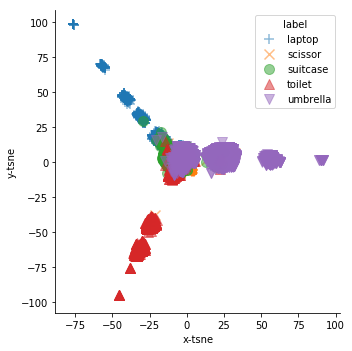

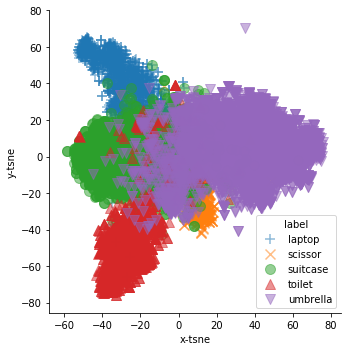

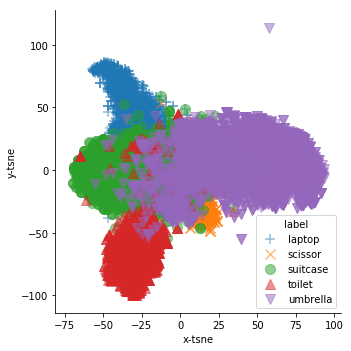

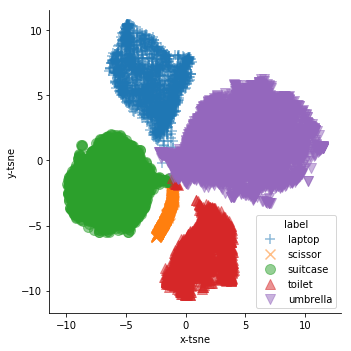

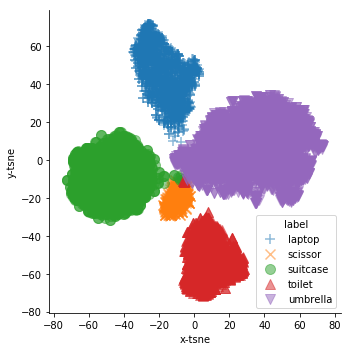

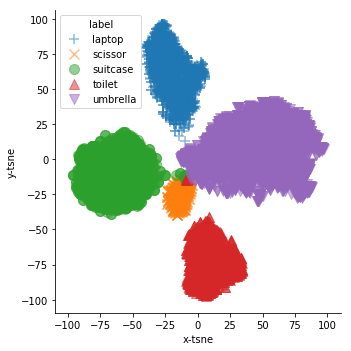

In [7]:

# Seaborn for plotting and styling
import seaborn as sns
import os, sys

fig_dir = caffe_root + 'models/' + classifier_type + '_classifier/all/fc7/' + class_name + '/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

for p in pp:
    for it in n_iter:
        x_str = 'x_' + str(p) + '_' + str(it)
        y_str = 'y_' + str(p) + '_' + str(it)
        fig_name = fig_dir + 'pp_' + str(p) + '_iter_' + str(it) + '_' + class_name
        g = sns.lmplot(x_str, y_str, data=df_tsne, hue='label', markers=['+', 'x', 'o', '^', 'v'], \
                   fit_reg=False, scatter_kws={'alpha':0.5, 's': 100}, legend_out = False)

        leg = g.axes.flat[0].get_legend()
        new_title = 'label'
        leg.set_title(new_title)

        # replace labels
        new_labels = ['laptop', 'scissor', 'suitcase', 'toilet', 'umbrella']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
        plt.xlabel('x-tsne')
        plt.ylabel('y-tsne')
        plt.savefig(fig_name)
        
for p in pp:
    for it in n_iter:
        x_str = 'x_' + str(p) + '_' + str(it)
        y_str = 'y_' + str(p) + '_' + str(it)
        new_name = fig_dir + 'pp_' + str(p) + '_iter_' + str(it) + '_new_' + class_name
        g = sns.lmplot(x_str, y_str, data=df_new_tsne, hue='label', markers=['+', 'x', 'o', '^', 'v'], \
                   fit_reg=False, scatter_kws={'alpha':0.5, 's': 100}, legend_out = False)

        leg = g.axes.flat[0].get_legend()
        new_title = 'label'
        leg.set_title(new_title)

        # replace labels
        new_labels = ['laptop', 'scissor', 'suitcase', 'toilet', 'umbrella']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
        plt.xlabel('x-tsne')
        plt.ylabel('y-tsne')
        plt.savefig(new_name)